#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline


In [2]:
from google.colab import files


In [3]:
upload = files.upload()

Saving fatal-police-shootings-data.csv to fatal-police-shootings-data.csv


In [4]:
data = pd.read_csv('fatal-police-shootings-data.csv')

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5338 non-null   int64  
 1   name                     5338 non-null   object 
 2   date                     5338 non-null   object 
 3   manner_of_death          5338 non-null   object 
 4   armed                    5098 non-null   object 
 5   age                      5089 non-null   float64
 6   gender                   5336 non-null   object 
 7   race                     4731 non-null   object 
 8   city                     5338 non-null   object 
 9   state                    5338 non-null   object 
 10  signs_of_mental_illness  5338 non-null   bool   
 11  threat_level             5338 non-null   object 
 12  flee                     5088 non-null   object 
 13  body_camera              5338 non-null   bool   
dtypes: bool(2), float64(1), 

In [50]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,1
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,1
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015,1
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,1
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015,1


In [6]:
#check for null values
data.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      240
age                        249
gender                       2
race                       607
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       250
body_camera                  0
dtype: int64

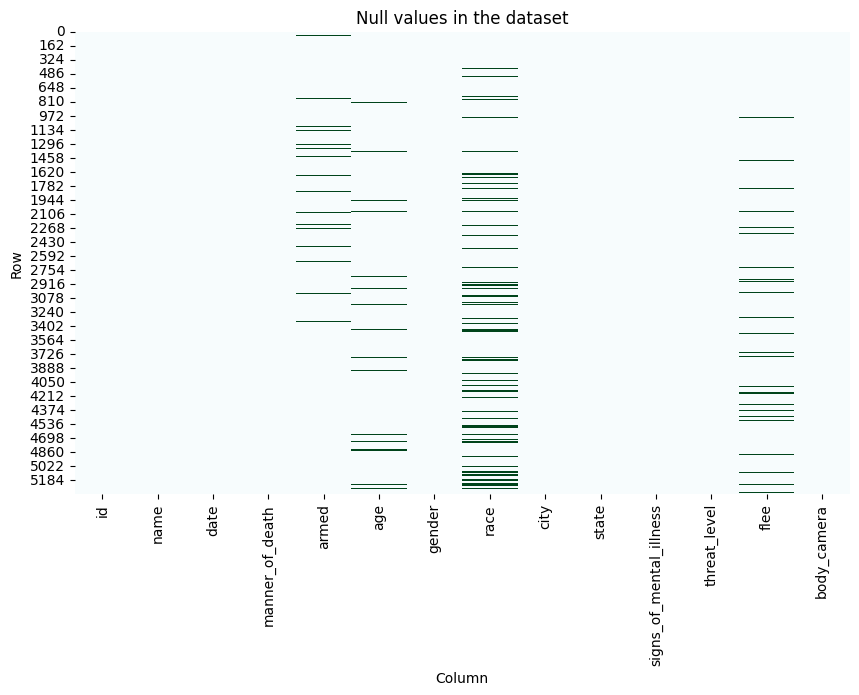

In [7]:
# Visualize null values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='BuGn', cbar=False)
plt.title("Null values in the dataset")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

In [8]:
# Impute missing values for 'age' column with the mean
data['age'].fillna(data['age'].mean(), inplace=True)

In [9]:
# Impute missing values for 'race' column with the mode
data['race'].fillna(data['race'].mode()[0], inplace=True)

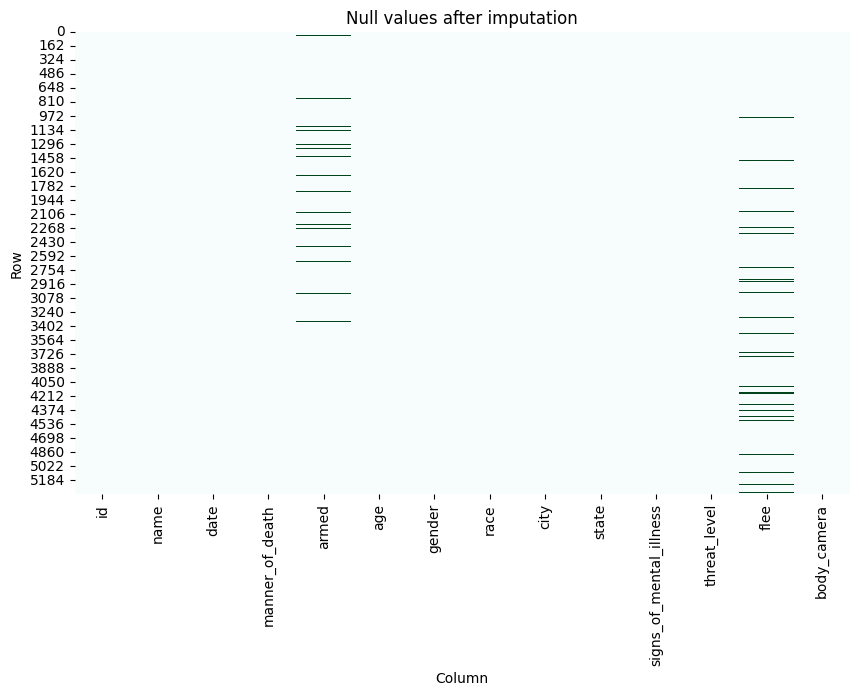

In [10]:
# Visualize the null values after imputation
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='BuGn', cbar=False)
plt.title("Null values after imputation")
plt.xlabel("Column")
plt.ylabel("Row")
plt.show()

In [11]:
# Impute missing values for 'gender' using  mode
data['gender'].fillna(data['gender'].mode()[0], inplace=True)


In [12]:
# Impute missing values for 'armed' and 'flee' with a custom value 'unknown'
data['armed'].fillna('unknown', inplace=True)
data['flee'].fillna('unknown', inplace=True)

In [13]:
#check for null values
#We have checked for all the null values, gender bit couldn't be represented on graph due to vast amount of dataset, thats where this code helped...
data.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

In [14]:
# Define a dictionary to map abbreviations to actual race names
race_mapping = {'W': 'White', 'B': 'Black', 'H': 'Hispanic', 'A': 'Asian', 'N': 'Native American', 'O': 'Other'}

# Replace the abbreviations with actual race names
data['race'] = data['race'].replace(race_mapping)


In [15]:
#check for any duplicated rows
data.duplicated().sum()

0

In [16]:
print(data.columns)

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [17]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False


In [18]:
data.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
5333,5815,TK TK,2020-05-20,shot,gun,37.121635,M,White,Viera,FL,True,attack,Not fleeing,False
5334,5836,Michael Snyder,2020-05-24,shot,gun,44.000000,M,White,Bulls Gap,TN,True,attack,Foot,False
5335,5837,Gary P. Dorton,2020-05-25,shot,knife,43.000000,M,White,Jonesborough,TN,True,attack,Not fleeing,False
5336,5839,TK TK,2020-05-25,shot,gun,38.000000,M,Hispanic,Houston,TX,False,attack,Not fleeing,False
5337,5838,John Allen Dunaway,2020-05-26,shot and Tasered,undetermined,61.000000,M,White,Jacksonville,FL,False,other,Foot,True


In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5338 entries, 0 to 5337
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5338 non-null   int64  
 1   name                     5338 non-null   object 
 2   date                     5338 non-null   object 
 3   manner_of_death          5338 non-null   object 
 4   armed                    5338 non-null   object 
 5   age                      5338 non-null   float64
 6   gender                   5338 non-null   object 
 7   race                     5338 non-null   object 
 8   city                     5338 non-null   object 
 9   state                    5338 non-null   object 
 10  signs_of_mental_illness  5338 non-null   bool   
 11  threat_level             5338 non-null   object 
 12  flee                     5338 non-null   object 
 13  body_camera              5338 non-null   bool   
dtypes: bool(2), float64(1), 

In [20]:
data.shape

(5338, 14)

#Data Pre-Processing

##1. Label Encoding

In [21]:
# Print the DataFrame before label encoding
print("Before Label Encoding:")
print(data.head())



Before Label Encoding:
   id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha    OR                    False       attack   
2      M  Hispanic        Wichita    KS                    False        other   
3      M     White  San Francisco    CA                     True       attack   
4      M  Hispanic          Evans    CO                    False       attack   

          flee  body_camera

In [22]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'gender' column
data['gender'] = label_encoder.fit_transform(data['gender'])

# Encode the 'body_camera' column
data['body_camera'] = label_encoder.fit_transform(data['body_camera'])

# Encode the 'signs_of_mental_illness' column
data['signs_of_mental_illness'] = label_encoder.fit_transform(data['signs_of_mental_illness'])

In [23]:
# After label encoding

print("After Label Encoding:")
print(data.head())


After Label Encoding:
   id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

   gender      race           city state  signs_of_mental_illness  \
0       1     Asian        Shelton    WA                        1   
1       1     White          Aloha    OR                        0   
2       1  Hispanic        Wichita    KS                        0   
3       1     White  San Francisco    CA                        1   
4       1  Hispanic          Evans    CO                        0   

  threat_level         flee  body_camera  
0       attack  Not fleeing            0  
1       attack

Data Encoding

In [24]:
# Check the column names in your dataset
print(data.columns)

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')


In [25]:
from sklearn.preprocessing import LabelEncoder #label encoding on threat, flee and race..

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'race' column
data['race_encoded'] = label_encoder.fit_transform(data['race'])

# Encode 'threat_level' column
data['threat_level_encoded'] = label_encoder.fit_transform(data['threat_level'])

# Encode 'flee' column
data['flee_encoded'] = label_encoder.fit_transform(data['flee'])

# Display the first few rows of the encoded data
print(data[['race', 'race_encoded', 'threat_level', 'threat_level_encoded', 'flee', 'flee_encoded']].head())


       race  race_encoded threat_level  threat_level_encoded         flee  \
0     Asian             0       attack                     0  Not fleeing   
1     White             5       attack                     0  Not fleeing   
2  Hispanic             2        other                     1  Not fleeing   
3     White             5       attack                     0  Not fleeing   
4  Hispanic             2       attack                     0  Not fleeing   

   flee_encoded  
0             2  
1             2  
2             2  
3             2  
4             2  


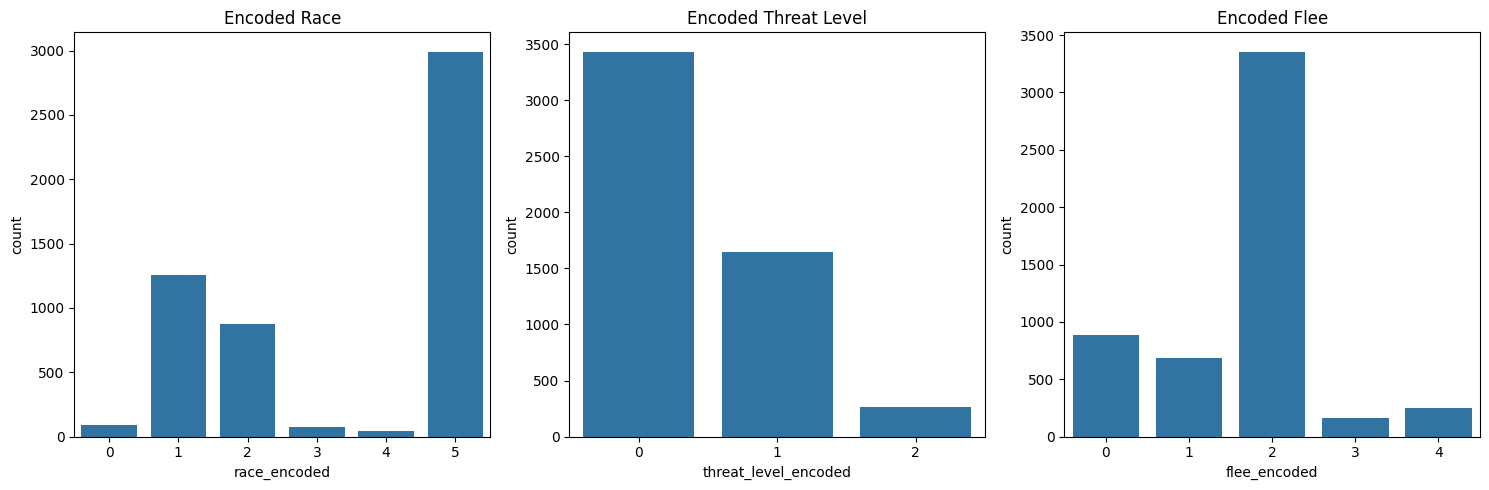

In [26]:

import seaborn as sns
import matplotlib.pyplot as plt #visualisation for the encoded data of race, flee and threat level..

# Define the subplot layout
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot for 'race_encoded'
sns.countplot(data=data, x='race_encoded', ax=axes[0])
axes[0].set_title('Encoded Race')

# Plot for 'threat_level_encoded'
sns.countplot(data=data, x='threat_level_encoded', ax=axes[1])
axes[1].set_title('Encoded Threat Level')

# Plot for 'flee_encoded'
sns.countplot(data=data, x='flee_encoded', ax=axes[2])
axes[2].set_title('Encoded Flee')

plt.tight_layout()
plt.show()

##2. Feature Scaling

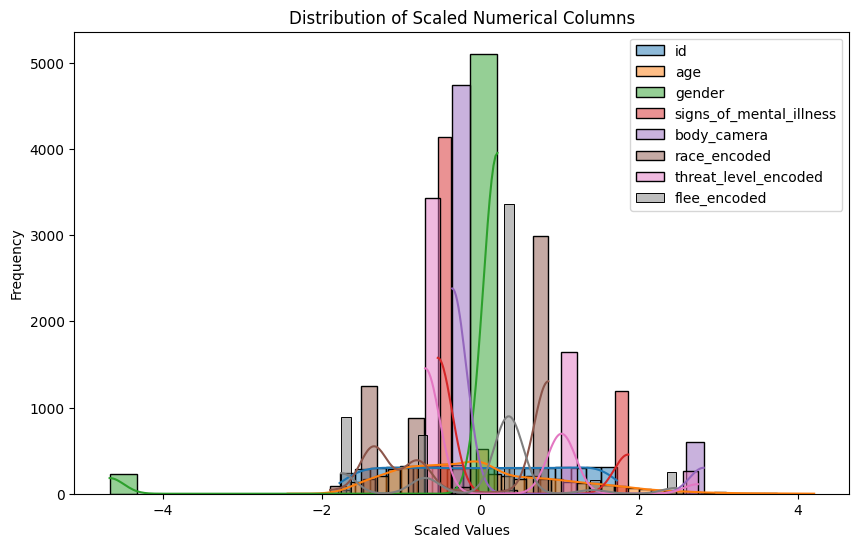

Numerical Data Distribution:
                          count          mean       std       min       25%  \
id                       5338.0  8.519059e-17  1.000094 -1.774247 -0.862672   
age                      5338.0  3.221269e-16  1.000094 -2.428348 -0.789767   
gender                   5338.0 -6.988290e-17  1.000094 -4.670328  0.214118   
signs_of_mental_illness  5338.0  1.064882e-17  1.000094 -0.537065 -0.537065   
body_camera              5338.0 -3.460868e-17  1.000094 -0.355525 -0.355525   
race_encoded             5338.0  2.395985e-17  1.000094 -1.892914 -1.343345   
threat_level_encoded     5338.0  1.064882e-16  1.000094 -0.696722 -0.696722   
flee_encoded             5338.0 -6.855180e-17  1.000094 -1.754742 -0.699088   

                              50%       75%       max  
id                       0.001027  0.871908  1.718252  
age                     -0.087519  0.614730  4.204002  
gender                   0.214118  0.214118  0.214118  
signs_of_mental_illness -0.537065 -

In [27]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the scaler
scaler = StandardScaler()

# Select all numerical columns for scaling
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Apply the scaler to the numerical columns
data[num_cols] = scaler.fit_transform(data[num_cols])

# Visualize the distribution of the scaled numerical columns
plt.figure(figsize=(10, 6))
for col in num_cols:
    sns.histplot(data[col], kde=True, alpha=0.5, label=col)
plt.title('Distribution of Scaled Numerical Columns')
plt.xlabel('Scaled Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Display numerical data distribution in text format
print("Numerical Data Distribution:")
print(data[num_cols].describe().T)


#EDA  
######EDA is an initial step in the data analysis process that helps you understand your dataset better before applying any specific analysis technique.

######EDA involves exploring and visualising your data to summarise its main characteristics, identify patterns, relationships, and anomalies, and determine the next steps in your analysis

###1.Summary statistics

In [28]:
# Summary statistics
print(data.describe())

# Frequency counts for categorical variables
print(data['race_encoded'].value_counts())


                 id           age        gender  signs_of_mental_illness  \
count  5.338000e+03  5.338000e+03  5.338000e+03             5.338000e+03   
mean   8.519059e-17  3.221269e-16 -6.988290e-17             1.064882e-17   
std    1.000094e+00  1.000094e+00  1.000094e+00             1.000094e+00   
min   -1.774247e+00 -2.428348e+00 -4.670328e+00            -5.370645e-01   
25%   -8.626724e-01 -7.897673e-01  2.141177e-01            -5.370645e-01   
50%    1.027035e-03 -8.751853e-02  2.141177e-01            -5.370645e-01   
75%    8.719077e-01  6.147303e-01  2.141177e-01            -5.370645e-01   
max    1.718252e+00  4.204002e+00  2.141177e-01             1.861974e+00   

        body_camera  race_encoded  threat_level_encoded  flee_encoded  
count  5.338000e+03  5.338000e+03          5.338000e+03  5.338000e+03  
mean  -3.460868e-17  2.395985e-17          1.064882e-16 -6.855180e-17  
std    1.000094e+00  1.000094e+00          1.000094e+00  1.000094e+00  
min   -3.555249e-01 -1.8929

###2. Data Visualisations

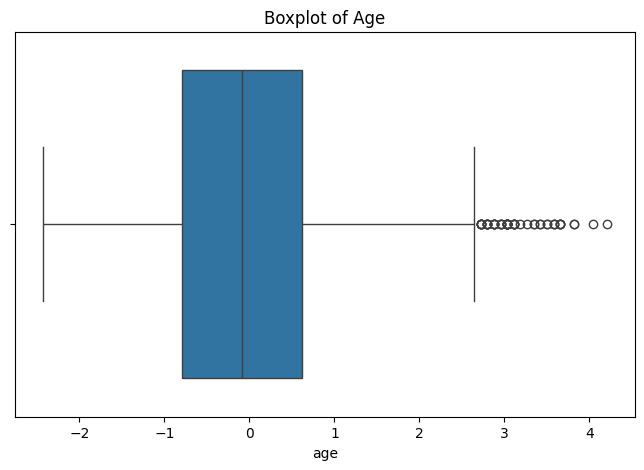

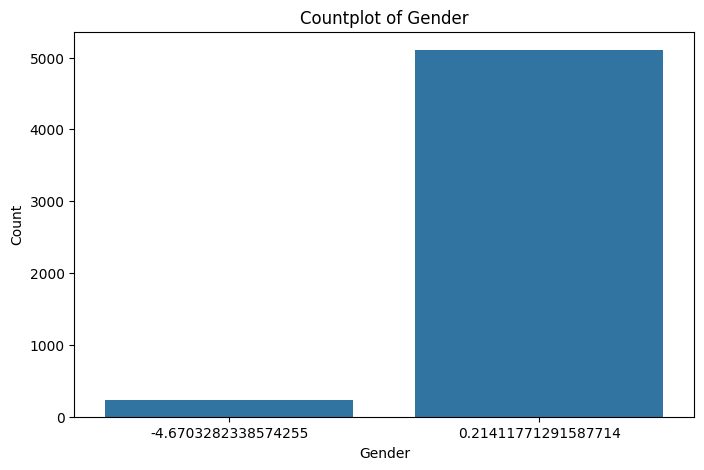

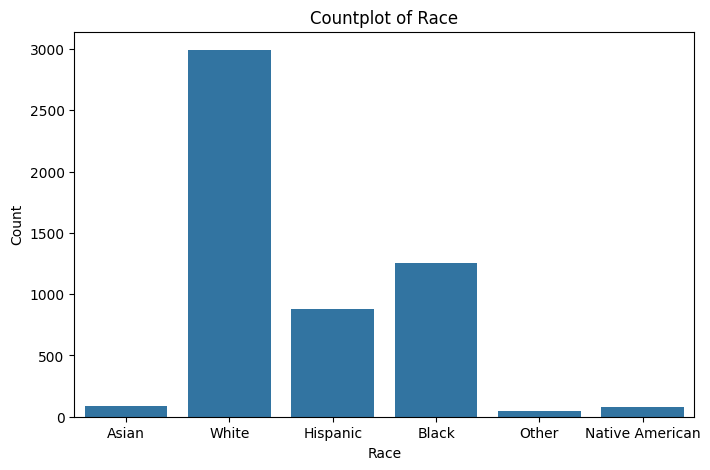

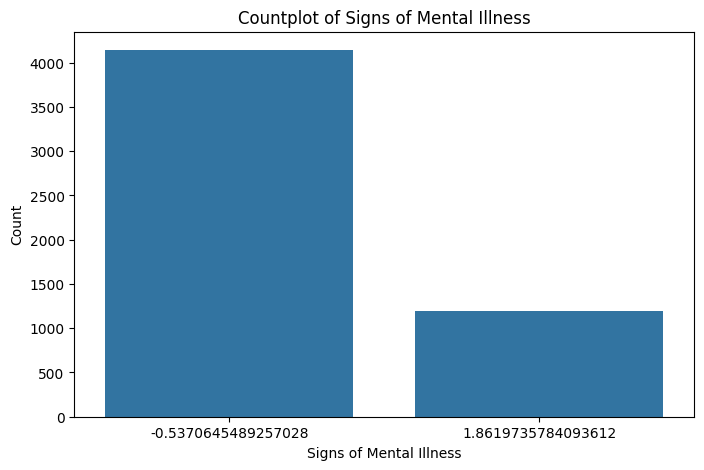

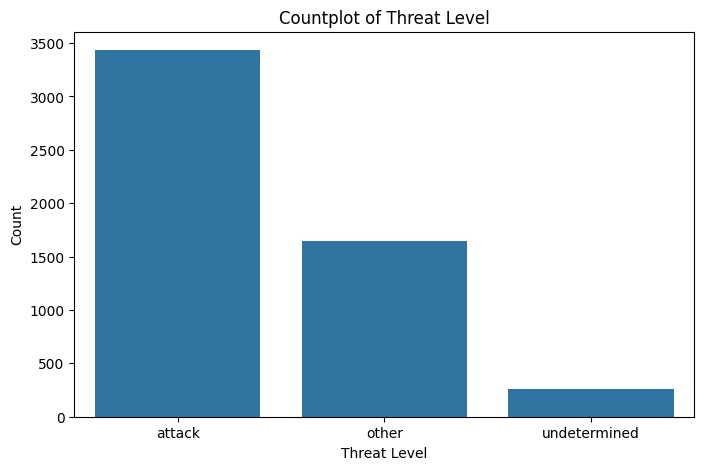

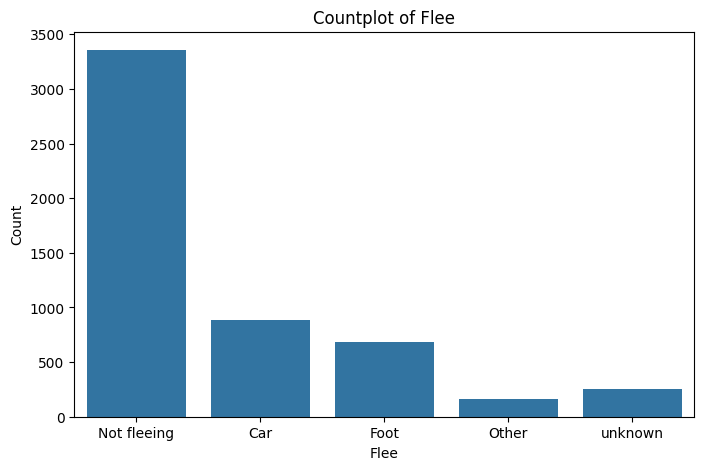

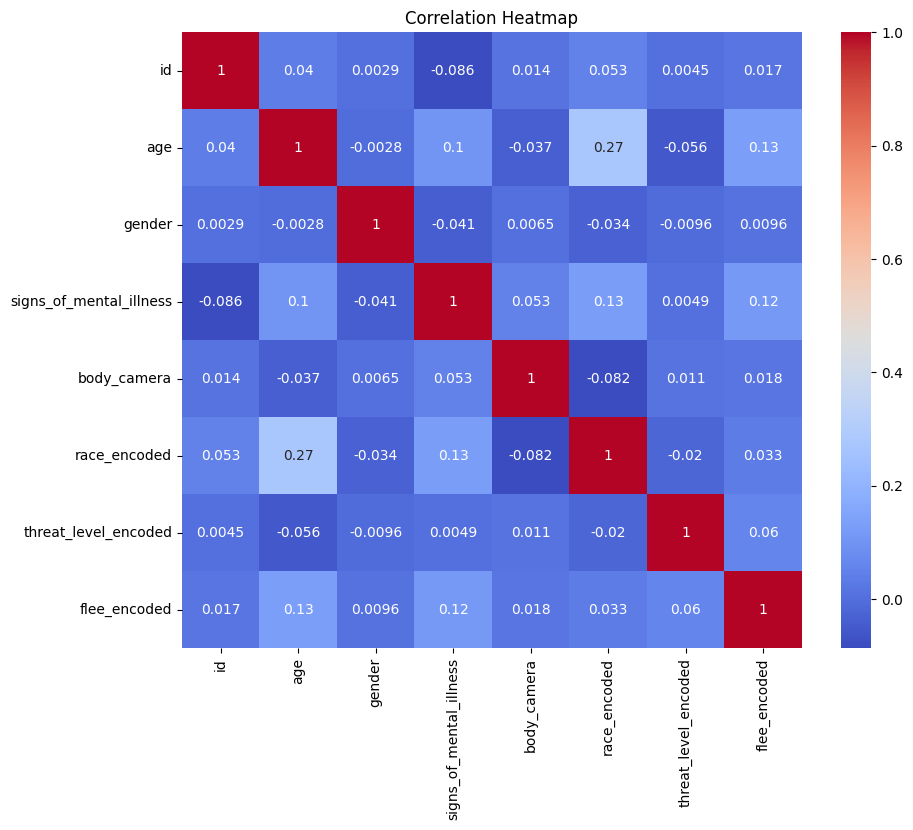

Numerical Data Distribution:
                          count          mean       std       min       25%  \
id                       5338.0  8.519059e-17  1.000094 -1.774247 -0.862672   
age                      5338.0  3.221269e-16  1.000094 -2.428348 -0.789767   
gender                   5338.0 -6.988290e-17  1.000094 -4.670328  0.214118   
signs_of_mental_illness  5338.0  1.064882e-17  1.000094 -0.537065 -0.537065   
body_camera              5338.0 -3.460868e-17  1.000094 -0.355525 -0.355525   
race_encoded             5338.0  2.395985e-17  1.000094 -1.892914 -1.343345   
threat_level_encoded     5338.0  1.064882e-16  1.000094 -0.696722 -0.696722   
flee_encoded             5338.0 -6.855180e-17  1.000094 -1.754742 -0.699088   

                              50%       75%       max  
id                       0.001027  0.871908  1.718252  
age                     -0.087519  0.614730  4.204002  
gender                   0.214118  0.214118  0.214118  
signs_of_mental_illness -0.537065 -

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Boxplot for age
plt.figure(figsize=(8, 5))
sns.boxplot(x='age', data=data, orient='h')
plt.title('Boxplot of Age')
plt.show()

# Countplot for gender
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='gender')
plt.title('Countplot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Countplot for race
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='race')
plt.title('Countplot of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Countplot for signs_of_mental_illness
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='signs_of_mental_illness')
plt.title('Countplot of Signs of Mental Illness')
plt.xlabel('Signs of Mental Illness')
plt.ylabel('Count')
plt.show()

# Countplot for threat_level
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='threat_level')
plt.title('Countplot of Threat Level')
plt.xlabel('Threat Level')
plt.ylabel('Count')
plt.show()

# Countplot for flee
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='flee')
plt.title('Countplot of Flee')
plt.xlabel('Flee')
plt.ylabel('Count')
plt.show()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Display numerical data distribution in text format
print("Numerical Data Distribution:")
print(numeric_data.describe().T)


#Principle Component Analysis

1. Standardize data





In [30]:
# Select only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)


2. Perform PCA

In [31]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=min(scaled_data.shape[0], scaled_data.shape[1]))

# Fit and transform the data
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])


3. Visualise PCA result

In [32]:
# Define original_columns
original_columns = numeric_cols.columns

# Convert scaled_data to DataFrame
scaled_data = pd.DataFrame(scaled_data, columns=original_columns)

# Check for missing values
#missing_values = scaled_data.isnull().sum()
#print(missing_values)
#Following result shows that preprocessing data, inclusing scaling and PCA were successful.


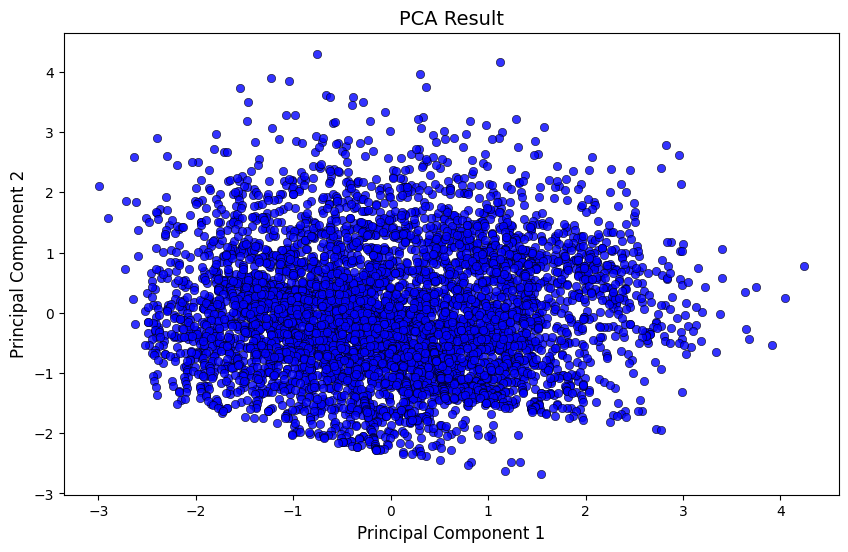

In [51]:
# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result[:, :2], columns=['PC1', 'PC2'])

# Visualise the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.8, color='blue', edgecolor='k')
plt.title('PCA Result', fontsize=14)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.show()


In [34]:
#checking explained variance ratio, ideally the first two pc should explain majority of variance in data..
print(pca.explained_variance_ratio_)


[0.1772184  0.14048909 0.13148064 0.12633318 0.12423755 0.11201187
 0.10201888 0.0862104 ]


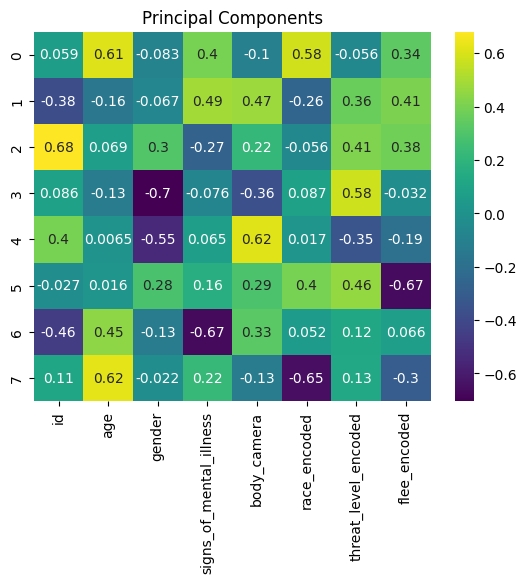

In [35]:
# Visualise the components
pca_components = pd.DataFrame(pca.components_, columns=numeric_cols.columns)
sns.heatmap(pca_components, cmap='viridis', annot=True)
plt.title('Principal Components')
plt.show()


##Evaluation of PCA

Explained Variance Ratio:
[0.1772184  0.14048909 0.13148064 0.12633318 0.12423755 0.11201187
 0.10201888 0.0862104 ]

Cumulative Variance Ratio:
[0.1772184  0.31770748 0.44918812 0.5755213  0.69975885 0.81177072
 0.9137896  1.        ]


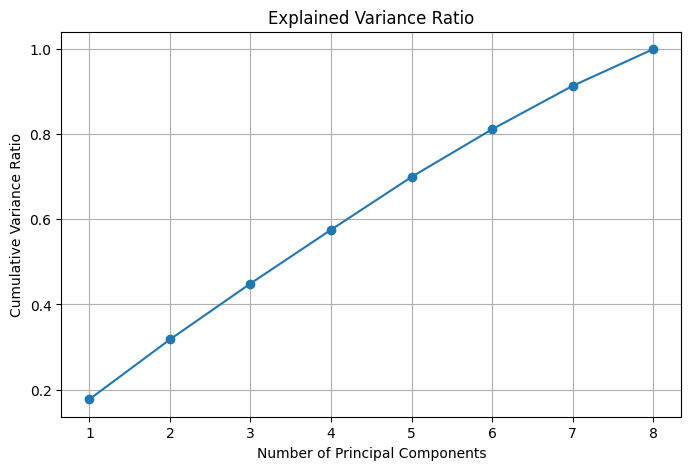

In [36]:
# Variance explained by each principal component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)

# Cumulative variance explained
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("\nCumulative Variance Ratio:")
print(cumulative_variance_ratio)

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Ratio')
plt.grid(True)
plt.show()


Explained Variance Ratio:
[0.1772184  0.14048909 0.13148064 0.12633318 0.12423755 0.11201187
 0.10201888 0.0862104 ]


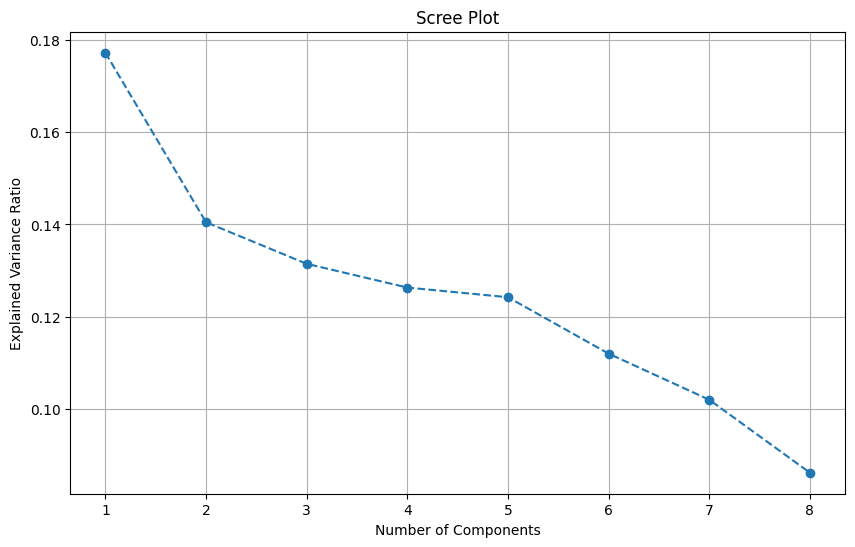

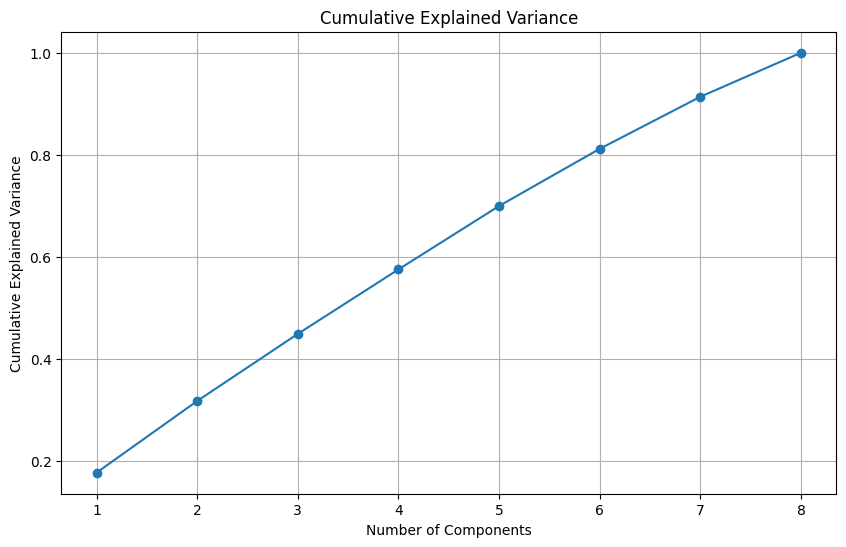

Reconstruction Error: 4.3793315498242263e-29


In [37]:
# Evaluate PCA

# 1. Explained Variance Ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# 2. Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

# 3. Cumulative Explained Variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, pca.n_components_ + 1))
plt.grid(True)
plt.show()

# 4. Reconstruction Error
reconstructed_data = pca.inverse_transform(pca_result)
reconstruction_error = np.mean(np.sum(np.square(scaled_data - reconstructed_data), axis=1))

print("Reconstruction Error:", reconstruction_error)


### Finding optimal k using the Silhouette and Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

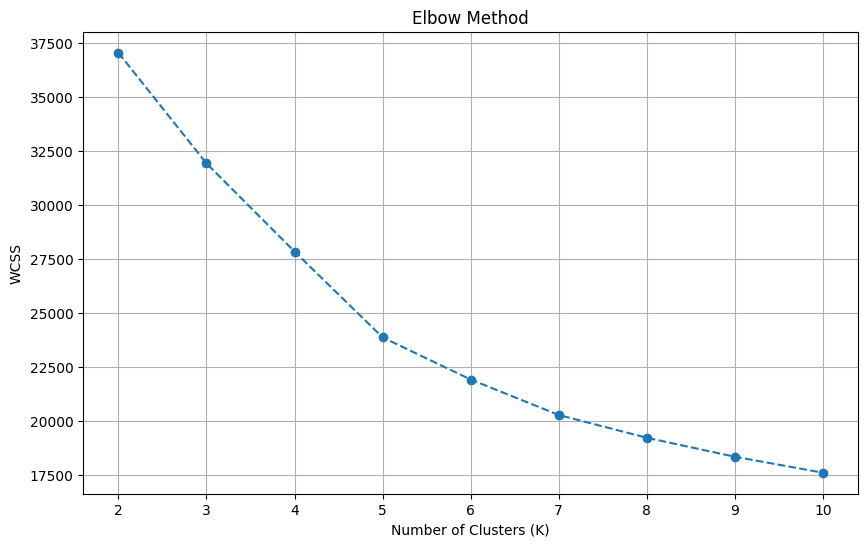

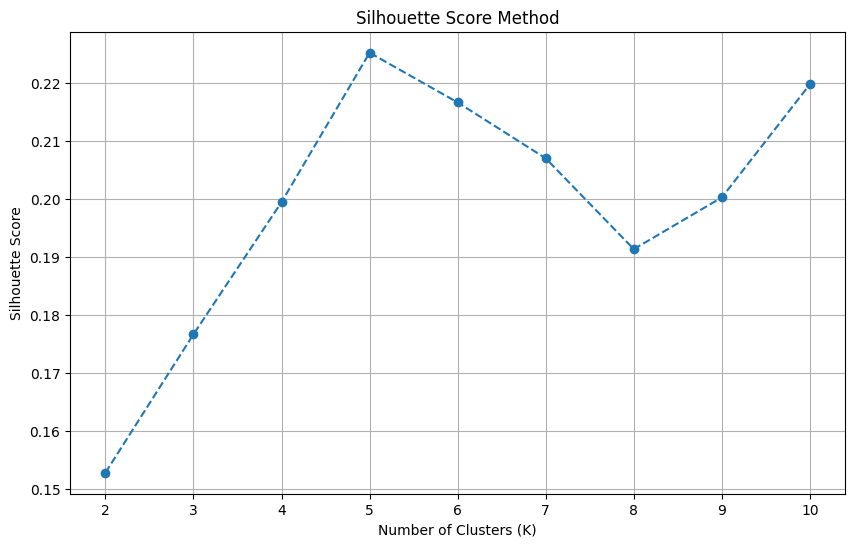

In [38]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Initialize a list to store the WCSS for different values of K
wcss = []

# Initialize a dictionary to store the silhouette score for different values of K
silhouette_scores = {}

# Define the range of K values to test
k_values = range(2, 11)

# Calculate WCSS and silhouette score for each value of K
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    if k > 1:
        silhouette_scores[k] = silhouette_score(scaled_data, kmeans.labels_)

# Plot the Elbow Method graph
plt.figure(figsize=(10,6))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Plot the Silhouette Score graph
plt.figure(figsize=(10,6))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)
plt.show()


###Applying K means Clustering with k = 5

In [39]:
from sklearn.cluster import KMeans

# Apply K-Means clustering with k = 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(scaled_data)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Check cluster labels and centroids
print("Cluster Labels:", cluster_labels)
print("Centroids:\n", centroids)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Labels: [2 4 1 ... 2 1 0]
Centroids:
 [[ 3.42508965e-02 -1.06116770e-01  2.14117713e-01  1.26321646e-01
   2.81274229e+00 -2.45162868e-01  2.62603925e-02  4.99663557e-02]
 [-5.57102549e-02 -3.68352560e-01  2.14117713e-01 -5.37064549e-01
  -3.55524928e-01 -1.11747588e+00 -1.43110718e-02 -1.03676287e-01]
 [-1.81363707e-01  1.95788179e-01  2.14117713e-01  1.86197358e+00
  -3.55524928e-01  2.67774726e-01  2.87096034e-03  2.13258466e-01]
 [-1.35912831e-02  1.32153981e-02 -4.67032823e+00  1.90848729e-01
  -3.05744437e-02  1.59749546e-01  4.47345737e-02 -4.49443552e-02]
 [ 1.26181452e-01  2.33683950e-01  2.14117713e-01 -5.37064549e-01
  -3.55524928e-01  8.32533640e-01 -2.76417050e-03 -2.95580029e-02]]


###3. Evaluating Quality of Clustering..

In [40]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for different values of k
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    if k > 1:
        silhouette_scores[k] = silhouette_score(scaled_data, cluster_labels)

# Find the value of k that maximizes the Silhouette Score
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
optimal_score = silhouette_scores[optimal_k]

print("Silhouette Scores:", silhouette_scores)
print("Optimal number of clusters (k):", optimal_k)
print("Silhouette Score for optimal k:", optimal_score)
   #5's values is highest....
#These scores indicate the quality of the clustering for each value of k.
#Higher Silhouette Scores indicate better-defined clusters.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Scores: {2: 0.1528421704605312, 3: 0.17671703862796068, 4: 0.19950589557308282, 5: 0.22527850924821832, 6: 0.21670945237106487, 7: 0.20706377411714533, 8: 0.19140184322137652, 9: 0.20031960594808831, 10: 0.2198396439126468}
Optimal number of clusters (k): 5
Silhouette Score for optimal k: 0.22527850924821832


###4.  Apply K-Means Clustering with Chosen k:

Analysis 1: Relationship between race and threat level:

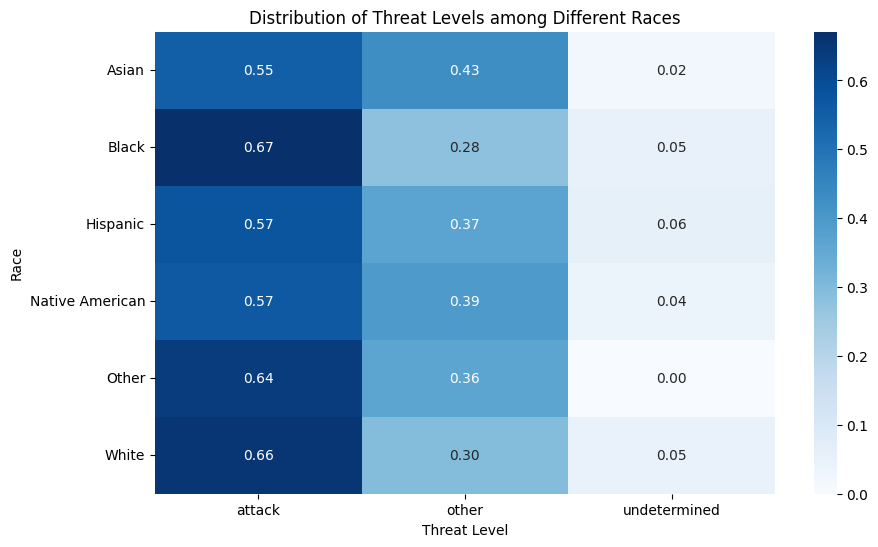

Race facing the highest threat level: threat_level
attack             Black
other              Asian
undetermined    Hispanic
dtype: object
Highest threat level by race: threat_level
attack          0.670654
other           0.428571
undetermined    0.058087
dtype: float64


In [41]:
# Analyse the distribution of different threat levels among different races
threat_level_race = pd.crosstab(index=data['race'], columns=data['threat_level'], normalize='index')

# Visualise the relationship between race and threat level
plt.figure(figsize=(10, 6))
sns.heatmap(threat_level_race, annot=True, cmap='Blues', fmt='.2f')
plt.title('Distribution of Threat Levels among Different Races')
plt.xlabel('Threat Level')
plt.ylabel('Race')
plt.show()

# Identify which race faces the highest threat level
highest_threat_race = threat_level_race.idxmax(axis=0)
highest_threat_level = threat_level_race.max(axis=0)

print("Race facing the highest threat level:", highest_threat_race)
print("Highest threat level by race:", highest_threat_level)


###Analysis 2: Police shootings over each month

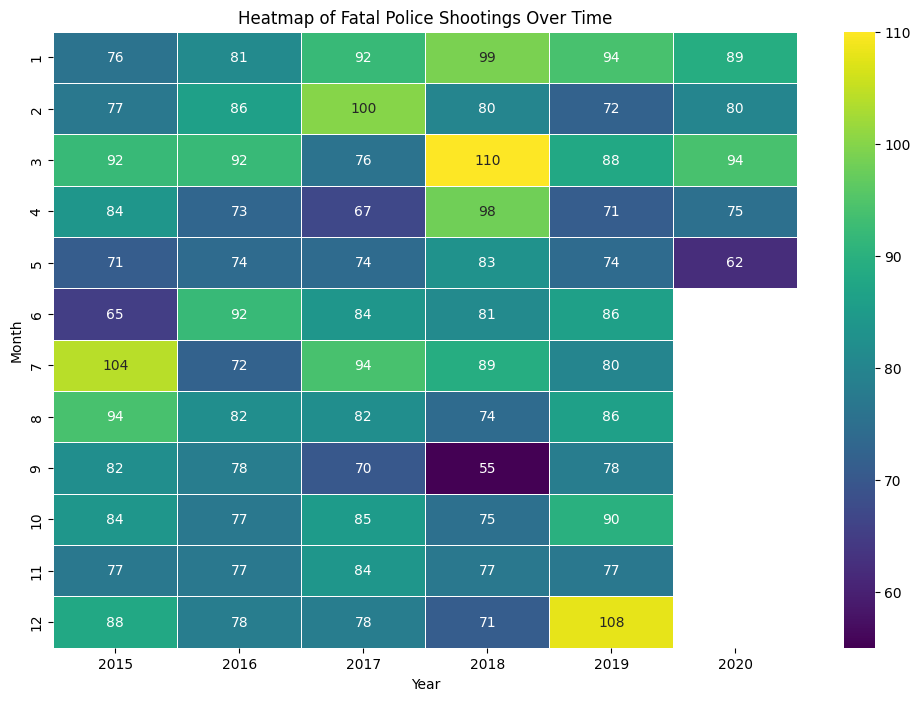

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("fatal-police-shootings-data.csv")

# Convert the "date" column to datetime
data['date'] = pd.to_datetime(data['date'])

# Extract year and month from the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

# Group the data by year and month and count the number of fatal shootings
shootings_per_month = data.groupby(['year', 'month']).size().reset_index(name='count')

# Create a pivot table for heatmap
heatmap_data = shootings_per_month.pivot_table(index='month', columns='year', values='count', aggfunc=np.sum)

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="viridis", annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap of Fatal Police Shootings Over Time')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


### Analysis 3:  Relationship between   ages of race and gender:

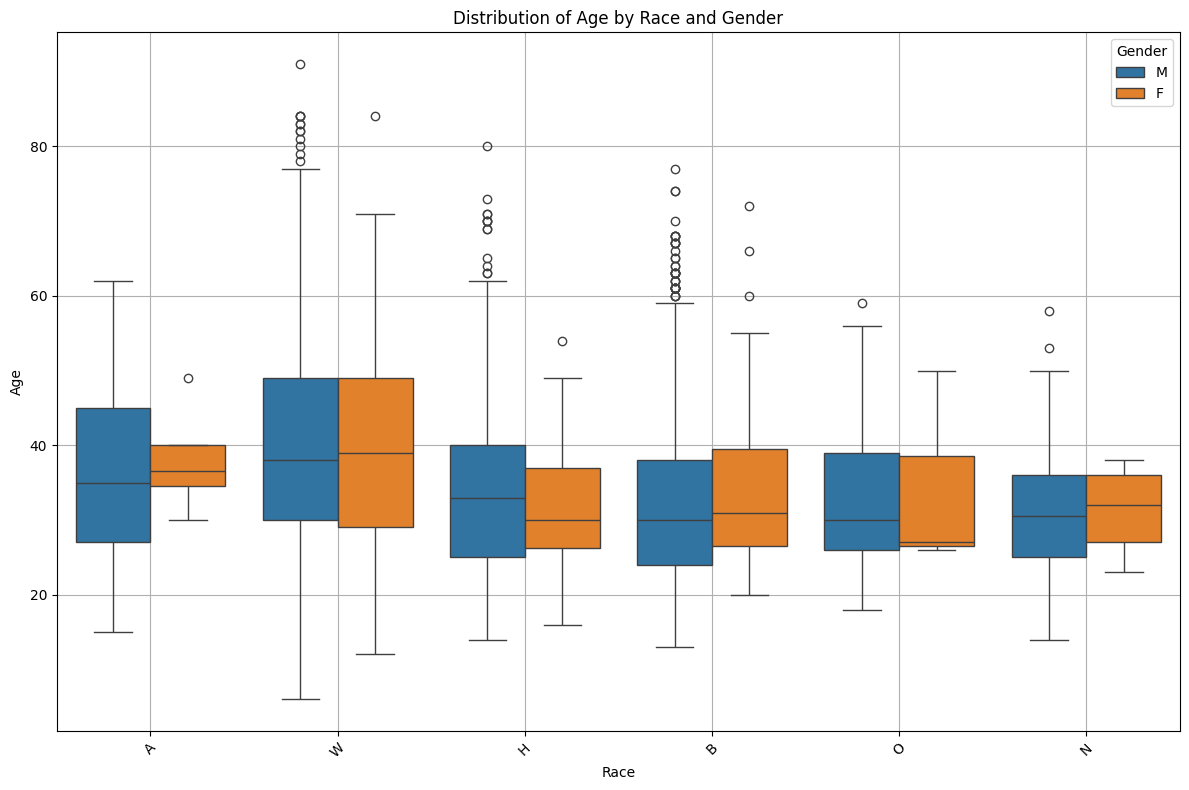

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot analysis of age by race and gender
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='race', y='age', hue='gender')
plt.title('Distribution of Age by Race and Gender')
plt.xlabel('Race')
plt.ylabel('Age')
plt.legend(title='Gender', loc='upper right')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


###Analysis 4: Pie chart analysis of signs of mental illness:


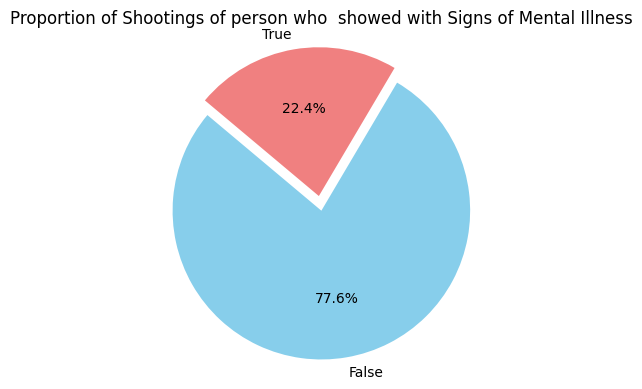

In [53]:
# Pie chart analysis of signs of mental illness
plt.figure(figsize=(6, 4))

# Count the number of occurrences for each category
mental_illness_counts = data['signs_of_mental_illness'].value_counts()

# Plotting the pie chart
mental_illness_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'], explode=[0, 0.1])

# Customising the plot
plt.title('Proportion of Shootings of person who  showed with Signs of Mental Illness')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()


#Evaluation

In [45]:
# Step 4: Evaluation
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for different values of k
silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    cluster_labels = kmeans.labels_
    if k > 1:
        silhouette_scores[k] = silhouette_score(scaled_data, cluster_labels)

# Find the value of k that maximizes the Silhouette Score
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
optimal_score = silhouette_scores[optimal_k]

print("Silhouette Scores:", silhouette_scores)
print("Optimal number of clusters (k):", optimal_k)
print("Silhouette Score for optimal k:", optimal_score)
# 5's value is the highest

# These scores indicate the quality of the clustering for each value of k.
# Higher Silhouette Scores indicate better-defined clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Scores: {2: 0.1528421704605312, 3: 0.17671703862796068, 4: 0.19950589557308282, 5: 0.22527850924821832, 6: 0.21670945237106487, 7: 0.20706377411714533, 8: 0.19140184322137652, 9: 0.20031960594808831, 10: 0.2198396439126468}
Optimal number of clusters (k): 5
Silhouette Score for optimal k: 0.22527850924821832
